In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


##Test FA Grid
####By Sergio Daniel Hernandez Charpak

Notebook to try to interact with the Fractional Anisotropy (FA) grid from by the c file. 
Here we read the results and plot them.

In [40]:
def writeFirstLine(filename,line):
    with open(filename,'r+') as f:
        content = f.read()
        f.seek(0,0)
        f.write(line.rstrip('\r\n') + '\n' + content)
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

In [41]:
inputfolder = '../'
inputfile = 'FA_1.dat'

First let's read the first line with all the parameters.
Its format is:
long long* n_nodes, long long* n_total_gen, int* n_x_gen, int* n_y_gen, int* n_z_gen, long long* n_nodes_gen, float* dx_gen, float* dy_gen, float* dz_gen, float* x_0_gen, float* y_0_gen, float* z_0_gen

In [42]:
firstline = readFirstLine(inputfolder+inputfile)
firstline = firstline.strip('\n')
firstline_array = firstline.split("\t")

In [43]:
n_nodes = (longlong(firstline_array[0]))
n_total = (longlong(firstline_array[1]))
n_x = (int(firstline_array[2]))
n_y = (int(firstline_array[3]))
n_z = (int(firstline_array[4]))
dx = (float(firstline_array[5]))
dy = (float(firstline_array[6]))
dz = (float(firstline_array[7]))
x_0 = (float(firstline_array[8]))
y_0 = (float(firstline_array[9]))
z_0 = (float(firstline_array[10]))

Now that we know the general parameters of the file we can proceed to read the rest of the file.
First we form the grid.

In [44]:
grid_FA = np.zeros((n_x,n_y,n_z))
print grid_FA.shape

(256, 256, 256)


In [45]:
f = open(inputfolder+inputfile)
count =0
#firstline again. We ignore it
line = f.readline()
#now we proceed to reading the rest
#each line corresponds to a i,j
for i in range (n_x):
    line = f.readline()
    if (line != '\n'):
        for j in range (n_y): 
            line = line.strip('\n')
            line_array = line.split("\t")
            for k in range (n_z):
                grid_FA[i,j,k] = double(line_array[k])
f.close()

In [46]:
max_FA, min_FA = grid_FA.max(), grid_FA.min()
print max_FA, min_FA
grid_FA

inf 0.57735


##Problem
These values are problematic. It seems that the FA isn't normalized.
We normalize but it is very likely the error comes from the C code.

In [60]:
new_grid_FA = grid_FA/max_FA

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [61]:
new_max_FA, new_min_FA = new_grid_FA.max(), new_grid_FA.min()
print new_max_FA, new_min_FA

nan nan


In [11]:
new_grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            new_grid_FA_1D[i + n_x * (j + n_y * k)] = new_grid_FA[i,j,k]

In [47]:
grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            grid_FA_1D[i + n_x * (j + n_y * k)] = grid_FA[i,j,k]

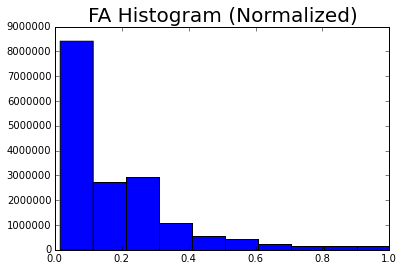

In [13]:
fig = plt.figure()
#binwidth=0.00000001
#plt.hist(new_grid_FA_1D, bins=np.arange(new_min_FA, new_max_FA + binwidth, binwidth))
plt.hist(new_grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram (Normalized)', fontsize=20)
#plt.close(fig)

In [14]:
plt.close(fig)
print max(new_grid_FA_1D), min(new_grid_FA_1D)

1.0 0.0167493972731


/home/shernand/.local/lib/python2.7/site-packages/numpy/core/function_base.py:99: RuntimeWarning: invalid value encountered in multiply
  y = _nx.arange(0, num, dtype=dtype) * step + start
/home/shernand/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:1114: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


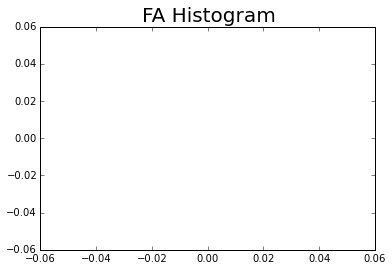

In [48]:
fig = plt.figure()
plt.hist(grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram', fontsize=20)
#plt.close(fig)

In [16]:
plt.close(fig)

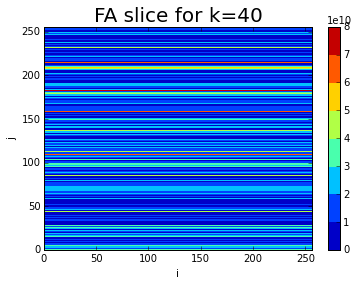

In [18]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)
plt.pcolor(X, Y, grid_FA[:,:,0])
plt.contourf(X, Y, grid_FA[:,:,40])
plt.colorbar()
plt.title('FA slice for k=40', fontsize=20)
plt.xlabel('i')
plt.ylabel('j')

In [19]:
plt.close(fig)
print new_grid_FA[0:10,0:10,0:10]

[[[ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.044828

All these results are definitively strange

##Test Divergence Grid
The divergence corresponds of the sum of the 3 eigen values

In [62]:
inputfile = 'div_1.dat'

In [63]:
firstline = readFirstLine(inputfolder+inputfile)
firstline = firstline.strip('\n')
firstline_array = firstline.split("\t")

In [64]:
n_nodes = (longlong(firstline_array[0]))
n_total = (longlong(firstline_array[1]))
n_x = (int(firstline_array[2]))
n_y = (int(firstline_array[3]))
n_z = (int(firstline_array[4]))
dx = (float(firstline_array[5]))
dy = (float(firstline_array[6]))
dz = (float(firstline_array[7]))
x_0 = (float(firstline_array[8]))
y_0 = (float(firstline_array[9]))
z_0 = (float(firstline_array[10]))

In [65]:
grid_Div = np.zeros((n_x,n_y,n_z))
print grid_Div.shape

(256, 256, 256)


In [66]:
f = open(inputfolder+inputfile)
count =0
#firstline again. We ignore it
line = f.readline()
#now we proceed to reading the rest
#each line corresponds to a i,j
for i in range (n_x):
    line = f.readline()
    if (line != '\n'):
        for j in range (n_y): 
            line = line.strip('\n')
            line_array = line.split("\t")
            for k in range (n_z):
                grid_Div[i,j,k] = double(line_array[k])
f.close()

In [67]:
max_Div, min_Div = grid_Div.max(), grid_Div.min()
print max_Div, min_Div

1.86406266364e+127 -3.66959778558e+106


La divergencia parece estar bien. Miremos su histograma y graficas a lo largo de z

In [55]:
grid_Div_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            grid_Div_1D[i + n_x * (j + n_y * k)] = grid_Div[i,j,k]

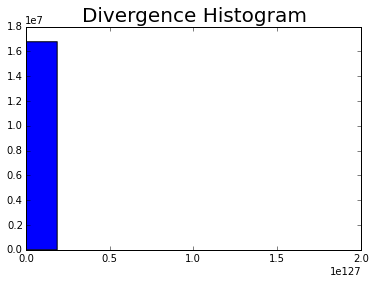

In [56]:
fig = plt.figure()
plt.hist(grid_Div_1D)
#plt.xlabel('
plt.title('Divergence Histogram', fontsize=20)
#plt.close(fig)

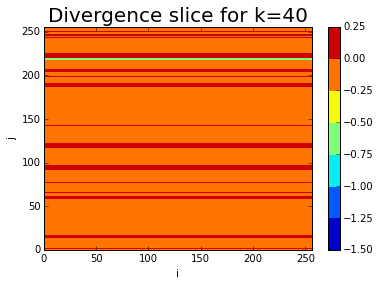

In [57]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)
plt.contourf(X, Y, grid_Div[:,:,40])
plt.colorbar()
plt.title('Divergence slice for k=40', fontsize=20)
plt.xlabel('i')
plt.ylabel('j')


(256, 256, 256)
(256, 256)
0.0


<matplotlib.colorbar.Colorbar instance at 0x7fd9a0dac518>

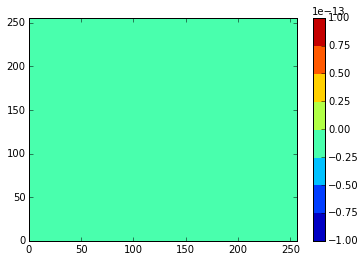

In [58]:
z_test = np.zeros((n_x,n_x))
print grid_Div.shape
#z_test = np.sum(grid_Div[:,:,120:125],axis=2)
print z_test.shape
print z_test[0,1]
fig = plt.figure()
levels=np.linspace(np.min(z_test),np.max(z_test), 10)
plt.contourf(X, Y, z_test)
plt.colorbar()

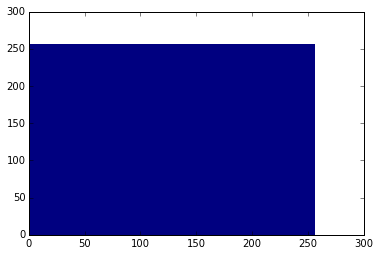

In [59]:
plt.pcolor(X, Y, grid_Div[:,:,0])

In [36]:
n_cuts = 8
l_x = n_x
l_y = n_y
l_z = n_z / n_cuts
l_z_old = 0

In [37]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)

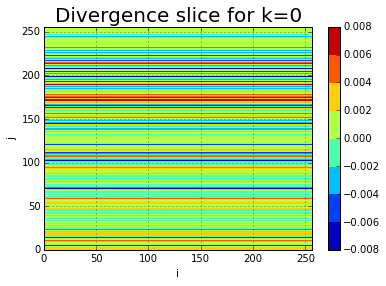

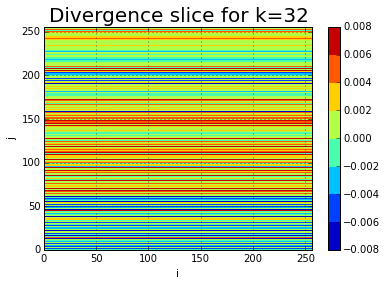

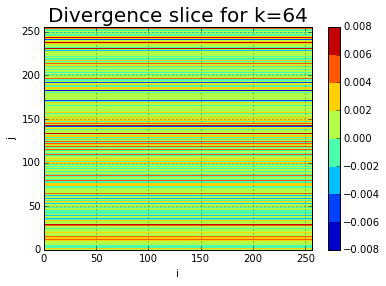

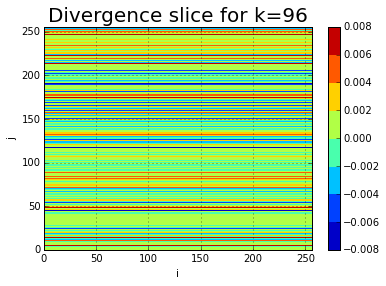

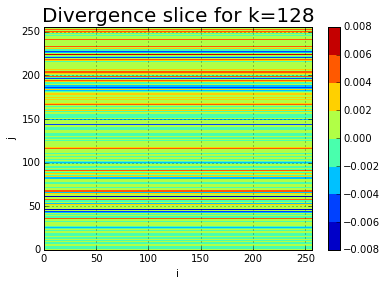

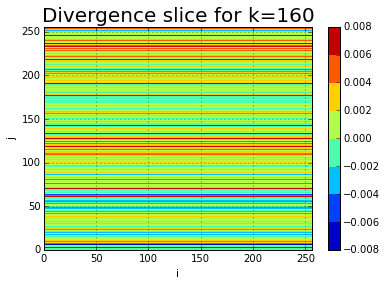

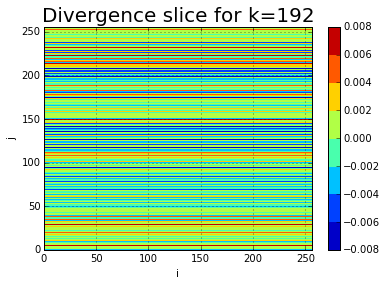

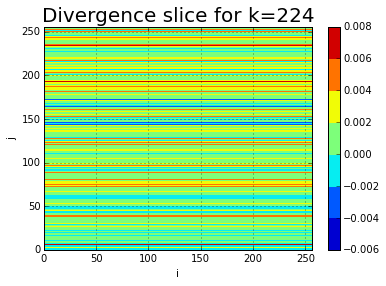

In [38]:
for i in range(0,n_cuts):
    l_z_new=l_z+i*l_z
    #new_grid = np.sum(grid_Div[:,:,l_z_old:l_z_new], axis=2)
    new_grid = grid_Div[:,:,l_z_old]
    fig=plt.figure()
    levels=np.linspace(np.min(new_grid),np.max(new_grid), 10)
    plt.contourf(X, Y, new_grid)
    plt.colorbar()
    plt.grid()
    plt.title('Divergence slice for k='+str(l_z_old), fontsize=20)
    plt.xlabel('i')
    plt.ylabel('j')
    l_z_old=l_z_new
    #plt.close(fig)
    

In [4]:
y = np.array([[1, 2, 1, 2],[2, 2, 0, 0],[5, 3, 4, 4],[2,1,2,2]])
y_prime = np.gradient(y)
print shape(y), shape(y_prime)
print shape(FA)

(4, 4) (2, 4, 4)


NameError: name 'FA' is not defined

In [5]:
print y_prime

[array([[ 1. ,  0. , -1. , -2. ],
       [ 2. ,  0.5,  1.5,  1. ],
       [ 0. , -0.5,  1. ,  1. ],
       [-3. , -2. , -2. , -2. ]]), array([[ 1. ,  0. ,  0. ,  1. ],
       [ 0. , -1. , -1. ,  0. ],
       [-2. , -0.5,  0.5,  0. ],
       [-1. ,  0. ,  0.5,  0. ]])]


In [6]:
mins = argrelmin(y)
maxs = argrelmax(y)
print mins, shape(mins)
print maxs, shape(maxs)
print mins[0], y[mins[0]], y[1,1]

NameError: name 'argrelmin' is not defined

In [7]:
import scipy.ndimage.filters as filters
import scipy.ndimage.morphology as morphology

#Taken from http://stackoverflow.com/questions/3986345/how-to-find-the-local-minima-of-a-smooth-multidimensional-array-in-numpy-efficie 
def detect_local_minima(arr):
    # http://stackoverflow.com/questions/3684484/peak-detection-in-a-2d-array/3689710#3689710
    """
    Takes an array and detects the troughs using the local maximum filter.
    Returns a boolean mask of the troughs (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """
    # define an connected neighborhood
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#generate_binary_structure
    neighborhood = morphology.generate_binary_structure(len(arr.shape),2)
    # apply the local minimum filter; all locations of minimum value 
    # in their neighborhood are set to 1
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.filters.html#minimum_filter
    local_min = (filters.minimum_filter(arr, footprint=neighborhood)==arr)
    # local_min is a mask that contains the peaks we are 
    # looking for, but also the background.
    # In order to isolate the peaks we must remove the background from the mask.
    # 
    # we create the mask of the background
    background = (arr==0)
    # 
    # a little technicality: we must erode the background in order to 
    # successfully subtract it from local_min, otherwise a line will 
    # appear along the background border (artifact of the local minimum filter)
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#binary_erosion
    eroded_background = morphology.binary_erosion(
        background, structure=neighborhood, border_value=1)
    # 
    # we obtain the final mask, containing only peaks, 
    # by removing the background from the local_min mask
    detected_minima = local_min - eroded_background
    return np.where(detected_minima)  

def detect_local_maxima(arr):
    # http://stackoverflow.com/questions/3684484/peak-detection-in-a-2d-array/3689710#3689710
    """
    Takes an array and detects the troughs using the local maximum filter.
    Returns a boolean mask of the troughs (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """
    # define an connected neighborhood
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#generate_binary_structure
    neighborhood = morphology.generate_binary_structure(len(arr.shape),2)
    # apply the local minimum filter; all locations of minimum value 
    # in their neighborhood are set to 1
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.filters.html#minimum_filter
    local_min = (filters.maximum_filter(arr, footprint=neighborhood)==arr)
    # local_min is a mask that contains the peaks we are 
    # looking for, but also the background.
    # In order to isolate the peaks we must remove the background from the mask.
    # 
    # we create the mask of the background
    background = (arr==0)
    # 
    # a little technicality: we must erode the background in order to 
    # successfully subtract it from local_min, otherwise a line will 
    # appear along the background border (artifact of the local minimum filter)
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#binary_erosion
    eroded_background = morphology.binary_erosion(
        background, structure=neighborhood, border_value=1)
    # 
    # we obtain the final mask, containing only peaks, 
    # by removing the background from the local_min mask
    detected_maxima = local_min - eroded_background
    return np.where(detected_maxima)  

\begin{bmatrix}
    1 & 2 & 1 & 2 \\
    2 & 2 & 0 & 0 \\
    5 & 3 & 4 & 4 \\
    2 & 2 & 2 & 2 \\
\end{bmatrix}

In [8]:
minimums = detect_local_minima(FA)
print minimums
print FA[minimums]

NameError: name 'FA' is not defined